## Part 1 - Pull in a data set and look at it

The question I had for my project was "given details on an apartment can we predict what the rent will be for it", I had a lot of trouble trying to find a good dataset on apartments that had data that didn't look fake or that was overall going to be usefull. I decided to go with "given details on a house can we predict what we can sell it for", I found this question to be a lot easier to find datasets for.

https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download

In [1]:
import pandas as pd

data_frame = pd.read_csv("Housing_data.gitignored/realtor-data.csv")
print(data_frame.keys())
data_frame.head(n=20)

C:\Users\S553834\AppData\Local\Temp\ipykernel_6732\4228088225.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['bed', 'bath', 'acre_lot', 'state', 'house_size', 'price'], dtype='object')


,bed,bath,acre_lot,state,house_size,price
0,3.0,2.0,0.12,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Puerto Rico,NaN,65000.0
5,4.0,3.0,0.46,Puerto Rico,2520.0,179000.0
6,3.0,1.0,0.20,Puerto Rico,2040.0,50000.0
7,3.0,2.0,0.08,Puerto Rico,1050.0,71600.0
8,2.0,1.0,0.09,Puerto Rico,1092.0,100000.0
9,5.0,3.0,7.46,Puerto Rico,5403.0,300000.0


Removed a lot of the columns that won't be usefull, status, prev_sold_date, and felt like city might be a little too specific.

House size is in sq ft, prices look fine for selling houses, i don't think a lot of people are doing to ask for an exact amount of money (ex. $157,642)

In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048540 entries, 0 to 1048539
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bed         904700 non-null   float64
 1   bath        925031 non-null   float64
 2   acre_lot    729355 non-null   float64
 3   state       1048540 non-null  object 
 4   house_size  706468 non-null   float64
 5   price       1048468 non-null  float64
dtypes: float64(5), object(1)
memory usage: 48.0+ MB


There are quite a bit of null values, since this dataset has 1mil entries i'm going to remove the null values

In [3]:
data_frame = data_frame.dropna(thresh=5)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822169 entries, 0 to 1048539
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         817457 non-null  float64
 1   bath        819238 non-null  float64
 2   acre_lot    614174 non-null  float64
 3   state       822169 non-null  object 
 4   house_size  687262 non-null  float64
 5   price       822169 non-null  float64
dtypes: float64(5), object(1)
memory usage: 43.9+ MB


In [4]:
data_frame["bed"].value_counts()

bed
3.0     261827
4.0     165860
2.0     164176
1.0      74396
5.0      68291
6.0      41371
7.0      14458
8.0      11698
9.0       6109
10.0      3044
12.0      2135
11.0      1525
13.0       374
14.0       354
15.0       345
18.0       259
20.0       242
16.0       201
24.0       144
19.0       127
22.0       116
17.0        91
28.0        54
21.0        42
46.0        38
42.0        30
60.0        27
86.0        21
32.0        21
31.0        20
27.0        13
33.0        11
49.0         8
29.0         7
68.0         6
36.0         5
40.0         3
23.0         3
47.0         3
30.0         1
35.0         1
Name: count, dtype: int64

86 beds is weird could be a hotel or something, looking at the datasheet it looks like it was one building that was sold multiple times.

In [5]:
data_frame.describe()

,bed,bath,acre_lot,house_size,price
count,817457.000000,819238.000000,614174.000000,6.872620e+05,8.221690e+05
mean,3.442440,2.595488,9.864668,2.157597e+03,9.659422e+05
std,1.989633,1.660645,677.953175,2.920813e+03,3.079277e+06
min,1.000000,1.000000,0.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.100000,1.134000e+03,3.159000e+05
50%,3.000000,2.000000,0.230000,1.659000e+03,5.290000e+05
75%,4.000000,3.000000,0.700000,2.501000e+03,8.990000e+05
max,86.000000,56.000000,100000.000000,1.450112e+06,8.750000e+08


100000 acres is interesting, I think 100000 acres is a value they put for some of the null values for some reason

I'm going to get rid of some of the outliers

## Part 2 - Clean the data

In [6]:
filtered_data = data_frame[data_frame["bed"] < 10]
filtered_data = filtered_data[filtered_data["bath"] < 10]
filtered_data = filtered_data[filtered_data["acre_lot"] < 3]
filtered_data = filtered_data[filtered_data["house_size"] < 5000]
filtered_data = filtered_data[filtered_data["price"] < 2000000]

array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'house_size'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

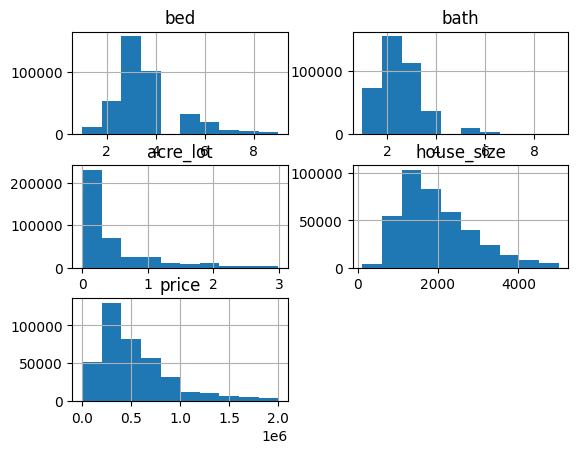

In [7]:
import matplotlib.pyplot as plt

filtered_data.hist(bins=10)

array([[<Axes: xlabel='bed', ylabel='bed'>,
        <Axes: xlabel='bath', ylabel='bed'>,
        <Axes: xlabel='acre_lot', ylabel='bed'>,
        <Axes: xlabel='house_size', ylabel='bed'>,
        <Axes: xlabel='price', ylabel='bed'>],
       [<Axes: xlabel='bed', ylabel='bath'>,
        <Axes: xlabel='bath', ylabel='bath'>,
        <Axes: xlabel='acre_lot', ylabel='bath'>,
        <Axes: xlabel='house_size', ylabel='bath'>,
        <Axes: xlabel='price', ylabel='bath'>],
       [<Axes: xlabel='bed', ylabel='acre_lot'>,
        <Axes: xlabel='bath', ylabel='acre_lot'>,
        <Axes: xlabel='acre_lot', ylabel='acre_lot'>,
        <Axes: xlabel='house_size', ylabel='acre_lot'>,
        <Axes: xlabel='price', ylabel='acre_lot'>],
       [<Axes: xlabel='bed', ylabel='house_size'>,
        <Axes: xlabel='bath', ylabel='house_size'>,
        <Axes: xlabel='acre_lot', ylabel='house_size'>,
        <Axes: xlabel='house_size', ylabel='house_size'>,
        <Axes: xlabel='price', ylabel='house_

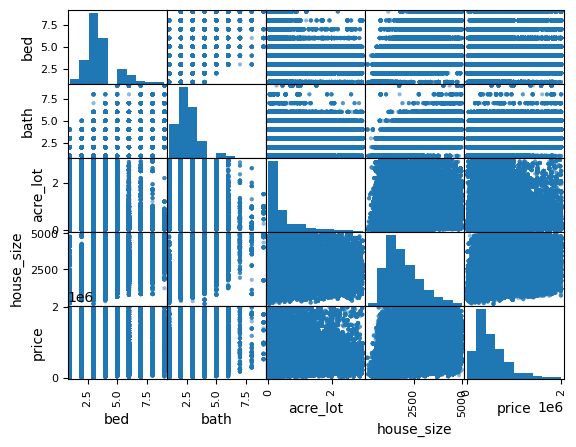

In [8]:
working_set = filtered_data.copy()

from pandas.plotting import scatter_matrix

compare = ["bed", "bath", "acre_lot", "house_size", "price"]
scatter_matrix(working_set[compare])

A lot of this looks weird because the values of bed and bath are pretty small so you can see the grouping 

In [9]:
corr = filtered_data.corr(numeric_only=True)
print(corr)

                 bed      bath  acre_lot  house_size     price
bed         1.000000  0.543623 -0.031449    0.629906  0.275608
bath        0.543623  1.000000  0.139524    0.715188  0.507137
acre_lot   -0.031449  0.139524  1.000000    0.215358  0.039177
house_size  0.629906  0.715188  0.215358    1.000000  0.485835
price       0.275608  0.507137  0.039177    0.485835  1.000000


not a whole lot of correlation, but these values are seperated by states so maybe picking a specific state will help

In [10]:
filtered_data["state"].value_counts()

state
Massachusetts     85163
New York          75999
New Jersey        67400
Connecticut       62499
Rhode Island      22005
New Hampshire     18566
Maine             16917
Puerto Rico       14123
Vermont           13942
Pennsylvania      12545
Delaware           1650
Virgin Islands      181
West Virginia         5
Wyoming               3
Name: count, dtype: int64

In [11]:
filtered_data = filtered_data[filtered_data["state"] == "Delaware"]
corr = filtered_data.corr(numeric_only=True)
print(corr)

                 bed      bath  acre_lot  house_size     price
bed         1.000000  0.414794  0.290705    0.533406  0.377572
bath        0.414794  1.000000  0.297610    0.671947  0.626529
acre_lot    0.290705  0.297610  1.000000    0.463312  0.543746
house_size  0.533406  0.671947  0.463312    1.000000  0.718388
price       0.377572  0.626529  0.543746    0.718388  1.000000


It made it a little better, but there still isn't a major correlation, i'm really surpised that the amount of acres that the house has isn't correlated with the price, maybe because if you have a lot of acres you probably aren't going to be in the city where houses are usually pricier.

I would like to be able to predict the selling price of a house given these other values

## Part 3 - Create training/test sets

In [12]:
import numpy as np
def fractional_split(filtered_data, test_fraction=0.2, seed=42):
    data_count = len(filtered_data)
    test_count = int(test_fraction*data_count)
    
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(data_count)
    
    test_indices = shuffled_indices[:test_count]
    train_indices = shuffled_indices[test_count:]
    
    return filtered_data.iloc[train_indices], filtered_data.iloc[test_indices]

train_set, test_set = fractional_split(filtered_data)

print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

1320 330
        bed  bath  acre_lot     state  house_size     price
631054  3.0   2.0      0.19  Delaware      2116.0  230000.0
612841  3.0   1.0      0.04  Delaware      1125.0   99900.0
631062  3.0   3.0      0.34  Delaware      2480.0  355000.0
631678  4.0   3.0      0.14  Delaware      1950.0  315000.0
612538  3.0   1.0      0.23  Delaware       950.0  144999.0
        bed  bath  acre_lot     state  house_size     price
631477  5.0   4.0      0.38  Delaware      3976.0  725000.0
612545  2.0   2.0      0.42  Delaware      1300.0  155000.0
632266  4.0   2.0      0.02  Delaware      1350.0  180000.0
631476  4.0   3.0      0.50  Delaware      3574.0  635000.0
612388  2.0   1.0      0.01  Delaware       650.0   72900.0
